# Implementing a Multivariate Linear Regression model in python
Earlier, I wrote about how to implement a simple linear regression (SLR) model in python. SLR is probably the easiest model to implement among the most popular machine learning algorithms. In this post, we are going to take it one step further and instead of working with just one independent variable, we will be working with multiple independent variables. Such a model is called a multivariate linear regression (MLR) model. 

## How does the model work?
A multivariate linear model can be described by a linear equation consisting of multiple independent variables. 

For example: ![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/0c3243c8f62b9416119fd46c2b9eb0e70e40037b)

In this equation, ß (beta) defines all the coefficients, x defines all the independent variables and y defines dependent variable.

An SLR model is a simplified version of an MLR model where there is only one x. Linear regression models use a technique called Ordinary Least Squares (OLS) to find the optimum value for the betas. OLS consists of calculating the error which is the difference between predicted value and actual value and then taking square of it. The goal is to find the betas that minimize the sum of the squared errors.

If you want to learn more about SLM and OLS, I highly recommend this [visual explanation](http://setosa.io/ev/ordinary-least-squares-regression/).

## How can I implement MLR model?
Implementing an MLR model is pretty much the same as implementing an SLR model. The only difference is that because you have additional independent variables, you need to make sure you select only the most relevant features/independent varibles in your final model. Not all of your data is necessary to build your model. In fact, most of the times, a lot of your data will be garbage and as you know garbige in means garbage out! The process of refining your model by selecting ideal features is called 'feature selection'. I will not be covering that in this post but will definitely do in a separate post. 

As discussed before, we are going to be following these steps:
- Exploring the dataset
- Preprocessing the dataset
- Splitting the dataset into training and testing set
- Building the model
- Evaluating the model

## Exploring the dataset
We will be working with automobile dataset provided by [UCI](https://archive.ics.uci.edu/ml/datasets/Automobile). This dataset has a lot of features and instead of looking at them all, we will select only a few important ones for simplicity. 

In [185]:
# Let's load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Loading entire dataset
dataset = pd.read_csv(r'/Users/himanshugupta/machine_learning/ml_algorithms/regression/multivariate_linear_regression/car_data.csv', names=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'], index_col=None)

# Select few important columns
dataset = dataset[['make', 'engine_size', 'horsepower', 'price']]

As we can see below, our dataset has four columns: 
- make: car company
- engine_size: size of the engine
- horsepower: horsepower
- price: price of the car

In [186]:
dataset.head()

,make,engine_size,horsepower,price
0,alfa-romero,130,111,13495
1,alfa-romero,130,111,16500
2,alfa-romero,152,154,16500
3,audi,109,102,13950
4,audi,136,115,17450


In [160]:
# Taking a deeper look, we can see that we have missing values denoted as '?' in our dataset
# For example, in the example below, you can see that last row has a price of '?' which doesn't make sense.
dataset[:10]

,make,engine_size,horsepower,price
0,alfa-romero,130,111,13495
1,alfa-romero,130,111,16500
2,alfa-romero,152,154,16500
3,audi,109,102,13950
4,audi,136,115,17450
5,audi,136,110,15250
6,audi,136,110,17710
7,audi,136,110,18920
8,audi,131,140,23875
9,audi,131,160,?


In [161]:
# Let's remove these '?' values from our dataset entirely
import numpy as np
dataset = dataset.replace('?', np.nan)

# Let's drop any null values
dataset = dataset.dropna()

Now, we are going to plot to scatter plots to see if there is any obvious relationship between our independent variables (features) and price. Of course, we can't plot 'make' so we will only focus on engine_size and horsepower.

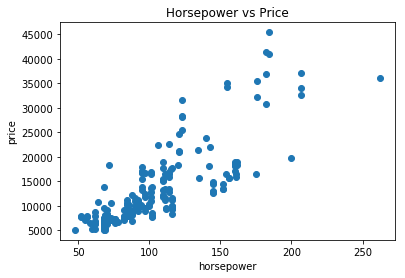

In [162]:
# As we can see from the scatter plot below, there seems to be a linear relationship between horsepower and price.
# This makes sense because a car with higher horsepower is usually more expensive. 
plt.scatter(dataset.horsepower, dataset.price);
plt.title('Horsepower vs Price');
plt.xlabel('horsepower');
plt.ylabel('price');

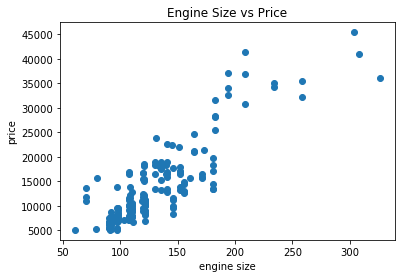

In [163]:
# The graph below also shows that there is a linear relationship between engine size. 
# We can see that as the engine size increases, the price also goes up. 
plt.scatter(dataset.engine_size, dataset.price);
plt.title('Engine Size vs Price');
plt.xlabel('engine size');
plt.ylabel('price');

## Preprocessing the dataset
Looking at the dataset, we can see that we have a categorical feature (make of the car). In one of my [earlier posts](http://www.enlistq.com/feature-encoding-python-using-scikit-learn/), I had covered how to handle categorical features so that they can be fed into our machine learning algorithms. 

But before we take care of that, let's separate our independent variables from our dependent variable.

In [164]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

Now, let's encode our categorical feature.

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_label_encoder = LabelEncoder()
X[:,0] = X_label_encoder.fit_transform(X[:,0])
one_hot_encoder = OneHotEncoder(categorical_features=[0])
X = one_hot_encoder.fit_transform(X).toarray()

As we can see below, we now have additional features that replace our categorical feature. Specifically, the number of additional features is equal to different categories that our categorical feature contained. 

In [168]:
X[:1]

array([[   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  130.,  111.]])

## Splitting the dataset into training and testing set
Let's split our dataset into training and testing sets so that we can build our model using the training set and then evaluate its performance against the testing set.

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

At this point, we have four different arrays:
- X_train - independent variable (training set)
- X_test - independent variable (testing set)
- y_train - dependent variable (training set)
- y_test - dependent variable (testing set)

We will use X_train and y_train to train our MLR model and then feed MLR model with X_test to get our predictions. We will compare these predictions that our model gave us with the actual data, y_test. By comparing these two datasets, we can evaluate our model's performance.

## Building the model
We will now train our model using the training dataset. This part of the code is exactly the same as simple linear regression model which is convenient.

In [170]:
# Training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting values using our trained model
y_pred = regressor.predict(X_test)

We can see the values of betas (coefficients) that the model decided worked best.

In [171]:
# We can see that some coefficients are positive while others are negative.
regressor.coef_

array([  5.04286278e+01,   2.65933264e+03,   5.89083259e+03,
        -3.11500003e+03,  -3.80910811e+03,  -2.99683368e+03,
        -3.51193600e+03,   5.22456157e+03,  -8.66600634e+02,
         1.09736581e+04,  -2.65323515e-12,  -4.58779074e+03,
        -3.88836645e+03,   1.40757251e+03,  -4.10575153e+03,
         8.14019921e+03,   2.42901088e+02,  -3.62064661e+03,
        -3.60193068e+03,  -2.27014471e+03,   1.78462282e+03,
         5.76994858e+01,   6.12275217e+01])

In [175]:
# Let's look at the output of y_test and y_pred

In [176]:
y_test

array(['6529', '7957', '13415', '15998', '17669', '41315', '7295', '9988',
       '6377', '8845', '21485', '10898', '9960', '6938', '9549', '15580',
       '7995', '10945', '12964', '7689', '16500', '10245', '6229', '7053',
       '6918', '6338', '7198', '19045', '10198', '13845', '12170', '11248',
       '13200', '11900', '6479', '16503', '7463', '34028', '8238', '10595'], dtype=object)

In [179]:
y_pred

array([  7614.6939764 ,   8443.88860355,  17550.07110467,  16772.19569363,
        12574.47007251,  29743.31738602,   7614.6939764 ,   9720.22189243,
         6197.20039611,  11965.73176647,  20621.00508468,   9720.22189243,
         9016.16820558,   6988.42875569,   9624.52475558,  14798.00867588,
         7160.4198525 ,  10006.22637194,  14719.8856298 ,   7961.84938802,
        18899.67212028,  11965.73176647,   5900.55697994,   7730.39025038,
         6152.41166731,   6152.41166731,   6988.42875569,  20366.53710178,
         9016.16820558,   8140.06019932,  14609.44956647,   9720.22189243,
        16644.39222235,  14920.46371923,   6512.59858623,  19442.62761778,
         8281.43794547,  32657.87975929,   6988.42875569,  11965.73176647])

In [183]:
# Let's convert all values to integers for better comparison
y_pred.astype(int)

array([ 7614,  8443, 17550, 16772, 12574, 29743,  7614,  9720,  6197,
       11965, 20621,  9720,  9016,  6988,  9624, 14798,  7160, 10006,
       14719,  7961, 18899, 11965,  5900,  7730,  6152,  6152,  6988,
       20366,  9016,  8140, 14609,  9720, 16644, 14920,  6512, 19442,
        8281, 32657,  6988, 11965])

## Evaluating the Model
At this point, we have two arrays with different values of our dependent variable:
- y_test - data that we set aside and didn't expost to our model when we were training it
- y_pred - data which is the output of our model

We would like to compare the two datasets to see how our model performed. How accurate was our model when predicting the price of cars?

We are going to use some common metrics like variance score, mean absolute error, mean squared error and r squared error to evaluate our model.

In [172]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
ex_var_score = explained_variance_score(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
m_squared_error = mean_squared_error(y_test, y_pred)
r_2_score = r2_score(y_test, y_pred)

print("Explained Variance Score: "+str(ex_var_score))
print("Mean Absolute Error "+str(m_absolute_error))
print("Mean Squared Error "+str(m_squared_error))
print("R Squared Error "+str(r_2_score))

Explained Variance Score: 0.856146798323
Mean Absolute Error 1686.02921501
Mean Squared Error 7170974.48696
R Squared Error 0.856040169966


An r squared error of 0.856 is good but not great. I think we can do better. However, I am going to end this post here as we have successfully implemented a multivariate linear regression model in python using scikit learn. In a different post, we will look at the same example with the same dataset and see how we can use feature selection to possibly improve this model!